In [2]:
import glob, sys, os
import numpy as np
import pandas as pd
import numpy.random as rd
import scipy as sp
from scipy import stats as st
from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation as ani
import seaborn as sns
#sns.set(style="whitegrid", palette="muted", color_codes=True)
%matplotlib inline
%config InlineBackend.figure_format='retina'
import sys
import os
import IPython.display as ipyd

# OS判別 ======================
flag_win32 = False
try:
    os.uname()
except AttributeError:
    flag_win32 = True

# Mac用フォント設定
if not flag_win32:
    from matplotlib import font_manager
    font_path = '/Library/Fonts/Osaka.ttf'
    font_prop = font_manager.FontProperties(fname=font_path)
    matplotlib.rcParams['font.family'] = font_prop.get_name()
    plt.rcParams['font.family'] = 'Osaka'

In [3]:


# サンプルごとの平均、分散を算出する関数
def sample_to_mean_var(sample):
    mean = np.mean(sample)
    var  = np.var(sample)
    return [mean, var]

# 平均、分散のヒストグラムを描画する関数
def plot_mean(mu, dist_name=""):
    bins = 40

    # 標本平均のヒストグラム
    plt.figure(figsize=(7,5))
    plt.hist(mu, bins=bins, normed=True, color="plum")
    plt.title("mu from %s distribution"%(dist_name))


def plot_hist(data, bins, title =""):
    plt.figure(figsize=(9,5))
    plt.title(title)
    plt.hist(data, bins, color="lightgreen", normed=True)

theoretical_mean=10.0, theoretical_var=99.99999999999999


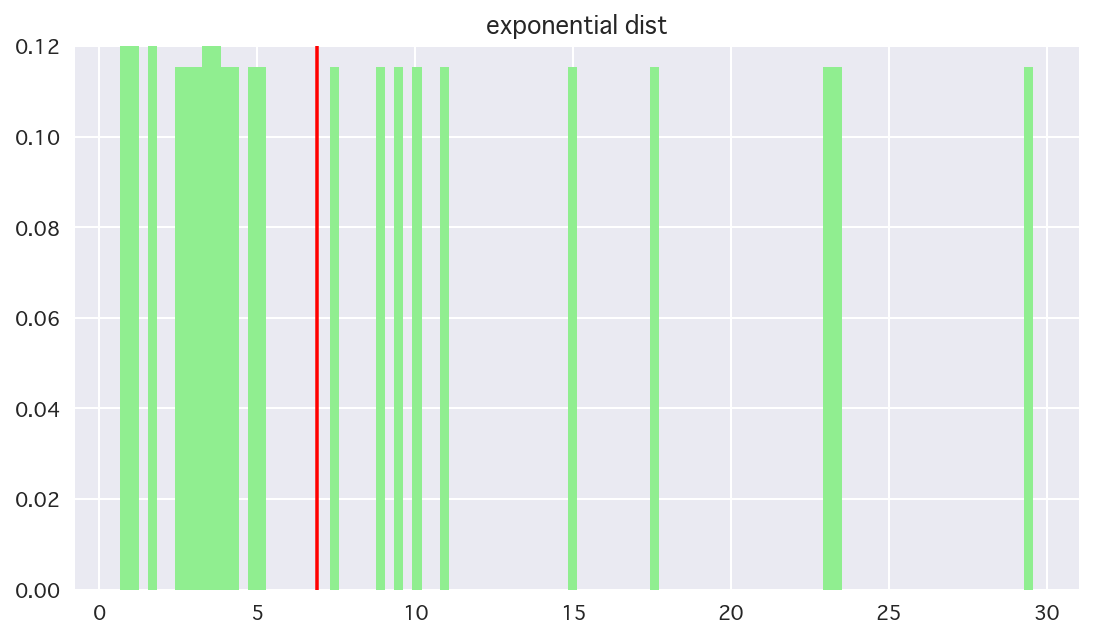

In [19]:
# サンプル用パラメータ
n = 10000
sample_size = 30

# 指数分布のグラフ描画
lam = 0.1
theoretical_mean = 1/lam
theoretical_var  = 1/lam**2
print("theoretical_mean={}, theoretical_var={}".format(theoretical_mean, theoretical_var))


x = rd.exponential(1./lam, size=sample_size)
m = np.mean(x)
plt.figure(figsize=(9,5))
plt.title("exponential dist")
plt.hist(x, 100, color="lightgreen", normed=True)
plt.plot([m, m], [0, 0.12], "r")
plt.ylim(0, 0.12)
plt.show()

In [20]:
# 指数分布のグラフ描画 アニメーション
rd.seed = 71
lam = 0.1
theoretical_mean = 1/lam
theoretical_var  = 1/lam**2
print("theoretical_mean={}, theoretical_var={}".format(theoretical_mean, theoretical_var))

num_frame = 10.
x_range= 7

def animate(nframe):
    global num_frame, fig
    plt.clf()
    x = rd.exponential(1./lam, size=sample_size)
    m = np.mean(x)
    plt.title("exponential dist, i={0:d}".format(int(nframe)))
    plt.hist(x, 100, color="lightgreen", normed=True)
    plt.plot([m, m], [0, 0.12], "r")
    plt.xlim(0, 120)
    plt.ylim(0, 0.12)
    #fig.tight_layout()
    #plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

fig = plt.figure(figsize=(9,5))
left = 0.05
bottom = 0.05
width = 0.9
height = 0.9
ax = fig.add_axes([left, bottom, width, height])
anim = ani.FuncAnimation(fig, animate, frames=int(num_frame))
anim.save('exp_hist.gif', writer='imagemagick', fps=5, dpi=128)

plt.close()

theoretical_mean=10.0, theoretical_var=99.99999999999999


In [21]:
ipyd.Image(url='exp_hist.gif?{}'.format(rd.uniform()), height=800, width=800)


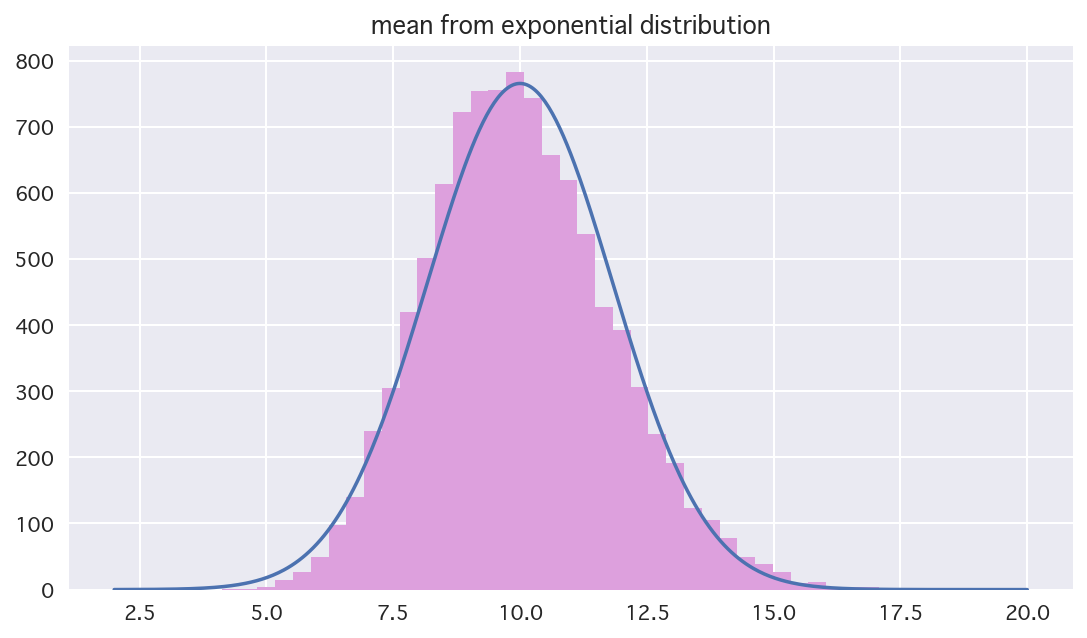

In [22]:
# 指数分布をたくさん生成して標本平均、標本分散のヒストグラムを描画
lam = 0.1
mean = np.array([np.mean(rd.exponential(1./lam, size=sample_size)) for i in range(n)])

bins = 40

# 標本平均のヒストグラム
plt.figure(figsize=(9,5))
out = plt.hist(mean, bins=bins, normed=False, color="plum")
plt.title("mean from %s distribution"%("exponential"))

# 理論正規分布
xx = np.linspace(2, 20, 501)
f = st.norm.pdf(xx, theoretical_mean, np.sqrt(theoretical_var/sample_size))
plt.plot(xx, f*n*np.diff(out[1])[0],zorder=100)

In [18]:
np.sqrt(theoretical_var/sample_size)

1.8257418583505536

In [39]:
np.diff(out[1])[0]

0.019075830881968514

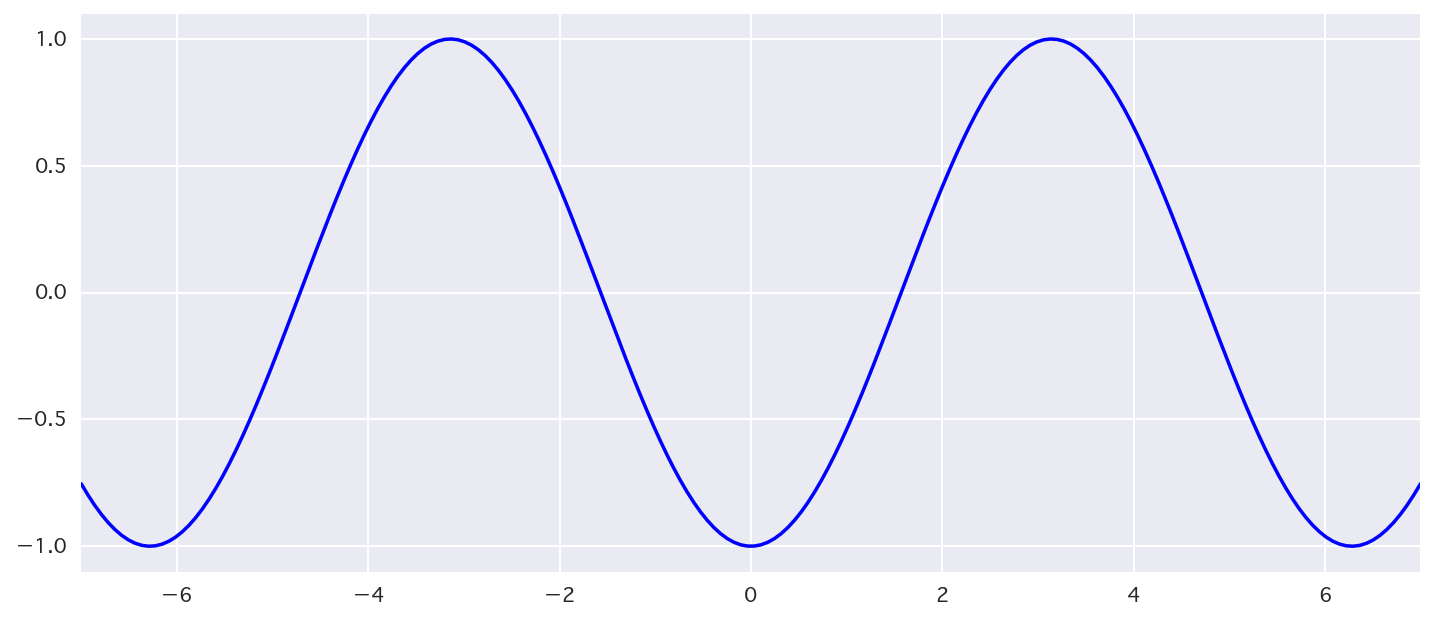

In [2]:


num_frame = 80.
x_range= 7

def animate(nframe):
    global num_frame
    plt.clf()
    a = ((5*nframe/num_frame) -.5) * np.pi
    x = np.linspace(-x_range, x_range, 200)
    y = np.sin(x+a)

    plt.xlim(-x_range, x_range)
    plt.ylim(-1.1,1.1)
    plt.plot(x, y, c="b")

fig = plt.figure(figsize=(12,5))
anim = ani.FuncAnimation(fig, animate, frames=int(num_frame))
anim.save('anim_test.gif', writer='imagemagick', fps=5, dpi=64)

In [6]:
ipyd.Image(url='anim_test.gif', height=800, width=800)


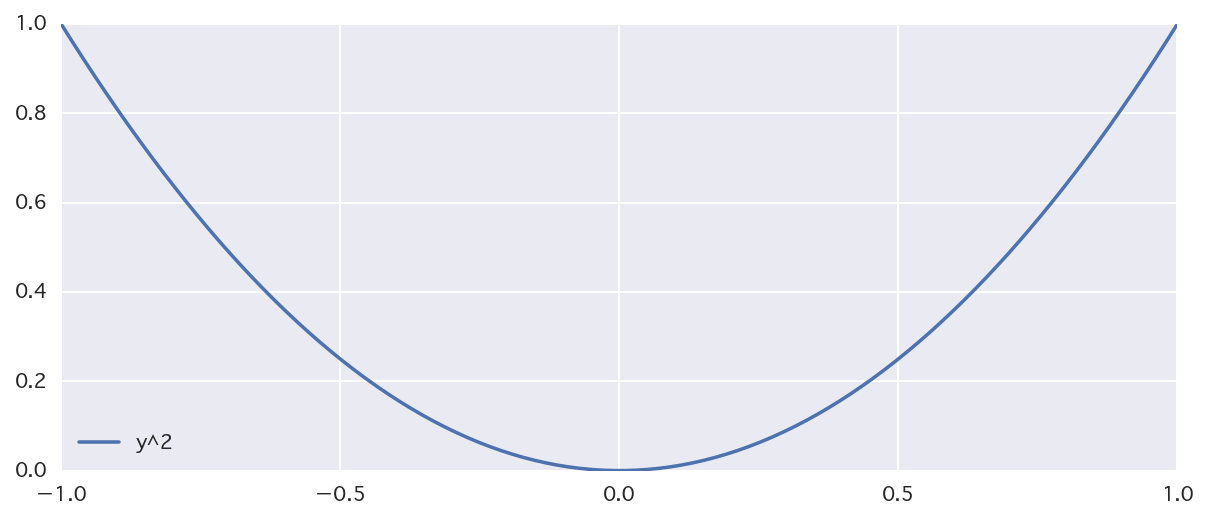

In [8]:
plt.figure(figsize=(10,4))
x = np.linspace(-1,1, 100)
y = x**2

plt.plot(x,y,label="y^2")
plt.legend(loc="best")
plt.show()

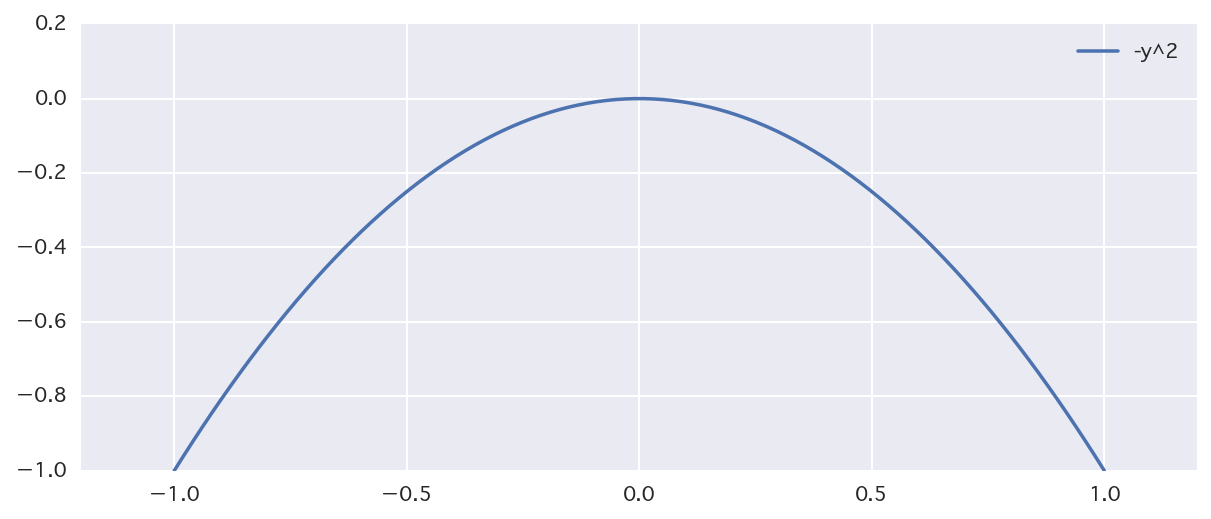

In [9]:
plt.figure(figsize=(10,4))
x = np.linspace(-1,1, 100)
y = -x**2

plt.xlim(-1.2,1.2)
plt.ylim(-1,0.2)
plt.plot(x,y,label="-y^2")
plt.legend(loc="best")
plt.show()

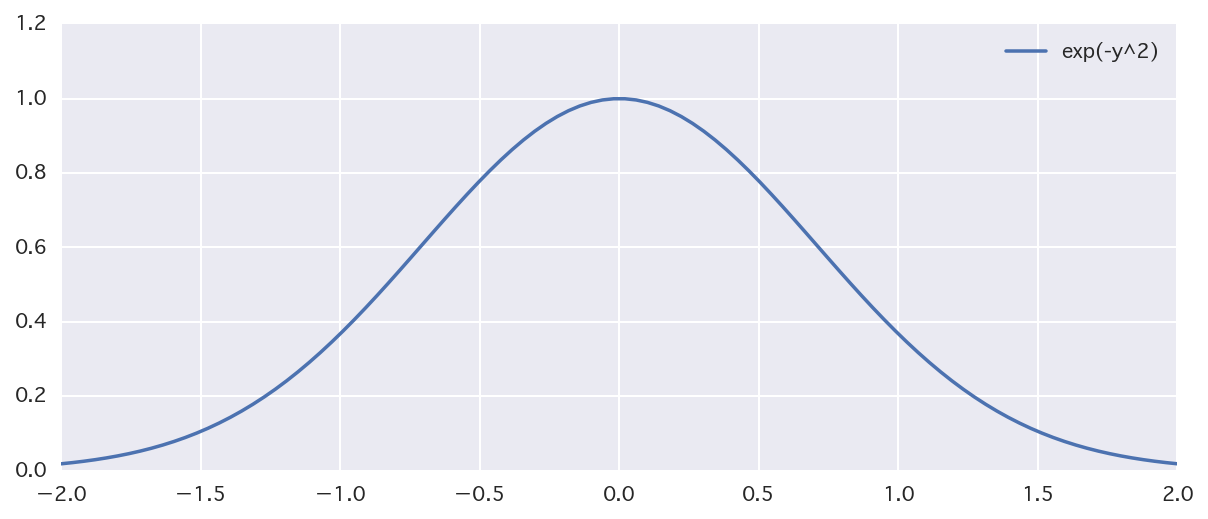

In [10]:
plt.figure(figsize=(10,4))
x = np.linspace(-2,2, 100)
y = np.exp(-x**2)

plt.xlim(-2,2)
plt.ylim(0,1.2)
plt.plot(x,y,label="exp(-y^2)")
plt.legend(loc="best")
plt.show()

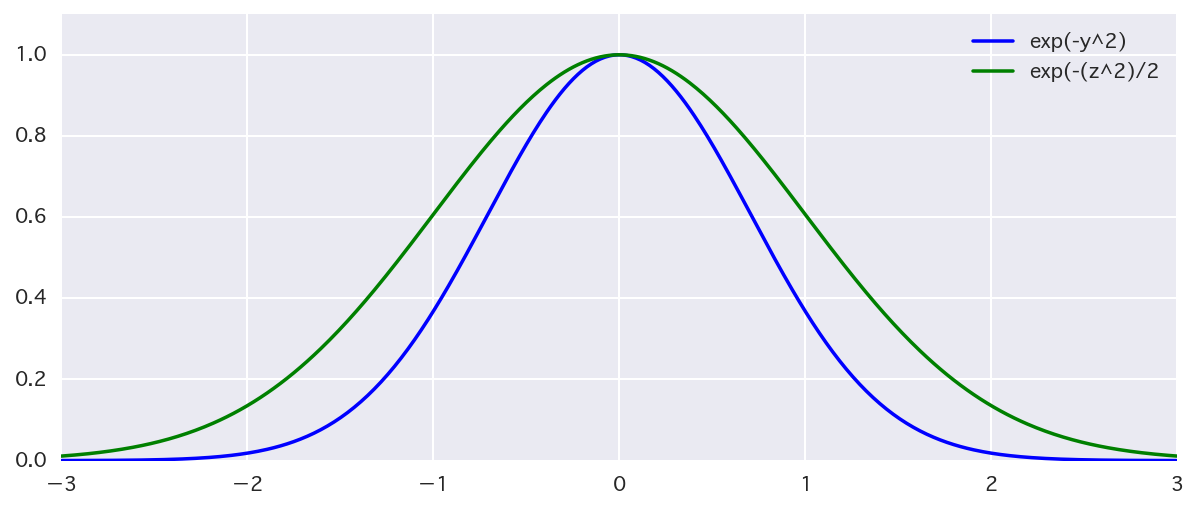

In [11]:
plt.figure(figsize=(10,4))
x = np.linspace(-3,3, 500)
y1 = np.exp(-(x**2))
y2 = np.exp(-(x**2)/2)

plt.xlim(-3,3)
plt.ylim(0,1.1)
plt.plot(x,y1,"b", label="exp(-y^2)")
plt.plot(x,y2,"g", label="exp(-(z^2)/2")
plt.legend(loc="best")
plt.show()

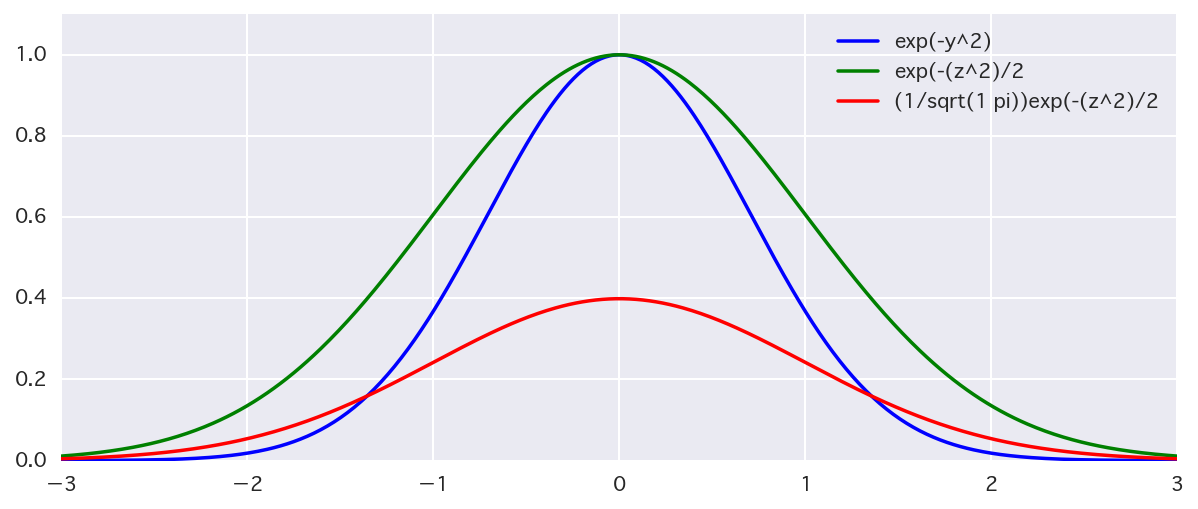

In [12]:
plt.figure(figsize=(10,4))
x = np.linspace(-3,3, 500)
y1 = np.exp(-(x**2))
y2 = np.exp(-(x**2)/2)
y3 = (1/(np.sqrt(2*np.pi)))*np.exp(-(x**2)/2)

plt.xlim(-3,3)
plt.ylim(0,1.1)
plt.plot(x,y1,"b", label="exp(-y^2)")
plt.plot(x,y2,"g", label="exp(-(z^2)/2")
plt.plot(x,y3,"r", label="(1/sqrt(1 pi))exp(-(z^2)/2")
plt.legend(loc="best")
plt.show()

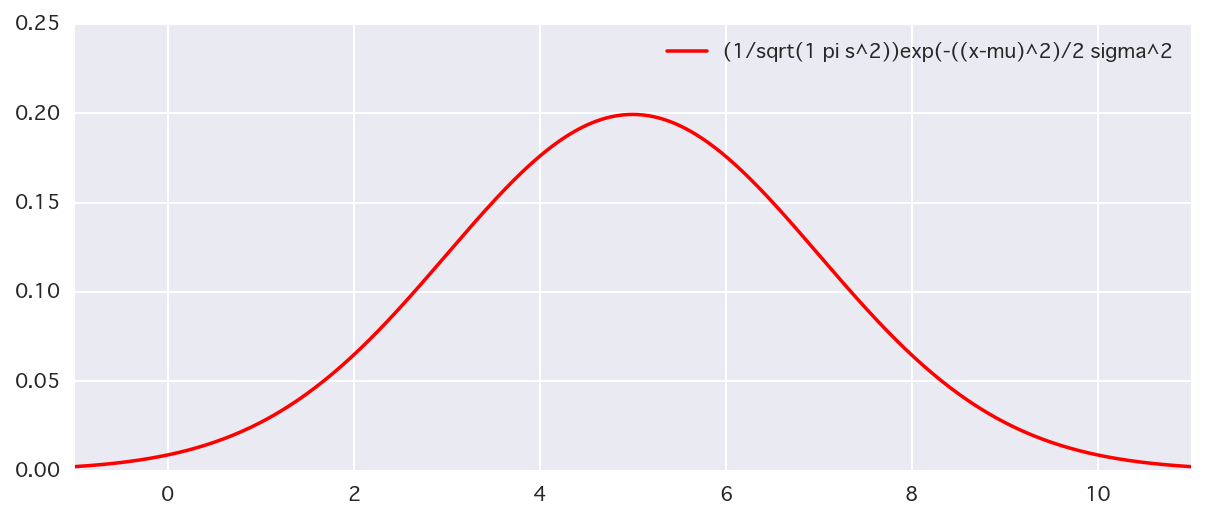

In [19]:
plt.figure(figsize=(10,4))
mu = 5
s  = 2
x = np.linspace(-1,11, 501)
y4 = (1/(np.sqrt(2*np.pi)*s))*np.exp(-((x-mu)**2)/(2*s**2))

plt.xlim(-1,11)
plt.ylim(0,0.25)
plt.plot(x,y4,"r", label="(1/sqrt(1 pi s^2))exp(-((x-mu)^2)/2 sigma^2")
plt.legend(loc="best")
plt.show()